## PACKAGES

In [78]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## 1. Exploratory Data Analysis (EDA) of Dataset_B

In [79]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Dataset_B.csv")

In [80]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19415 entries, 0 to 19414
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    19415 non-null  int64 
 1   Date             19415 non-null  object
 2   itemDescription  19415 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.2+ KB


In [81]:
# Display the first few rows of the dataset
data.head()

,Member_number,Date,itemDescription
0,3562,18-03-2015,salty snack
1,3145,16-11-2015,cake bar
2,3595,17-12-2015,whole milk
3,4934,17-03-2015,other vegetables
4,3386,03-02-2015,yogurt


In [82]:
# Frequency of 'itemDescription'
print(data['itemDescription'].value_counts())


whole milk               957
rolls/buns               901
soda                     863
yogurt                   774
other vegetables         752
                        ... 
organic sausage            2
frozen chicken             2
bags                       2
preservation products      1
baby cosmetics             1
Name: itemDescription, Length: 164, dtype: int64


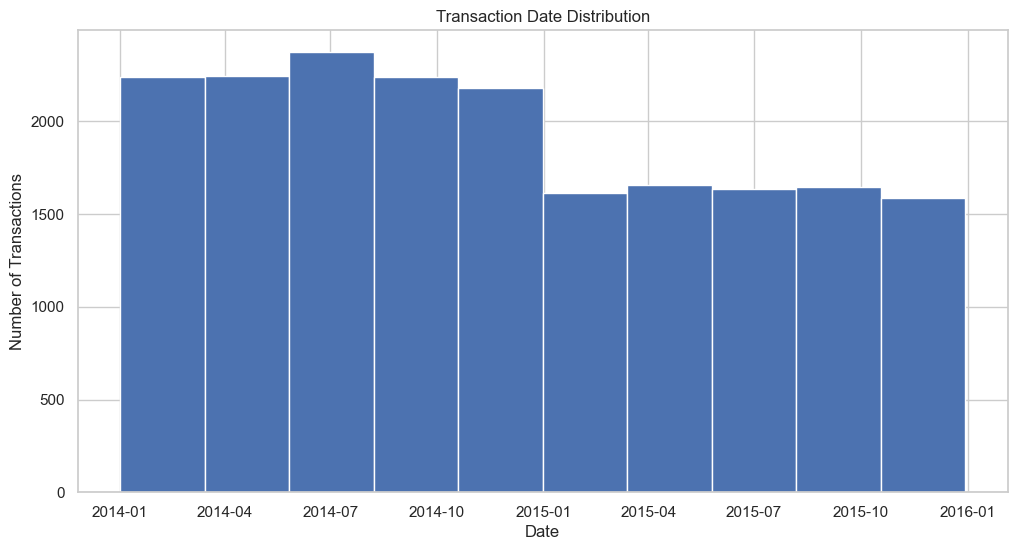

In [83]:
#Transaction by date distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'].hist()
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Transaction Date Distribution')
plt.show()

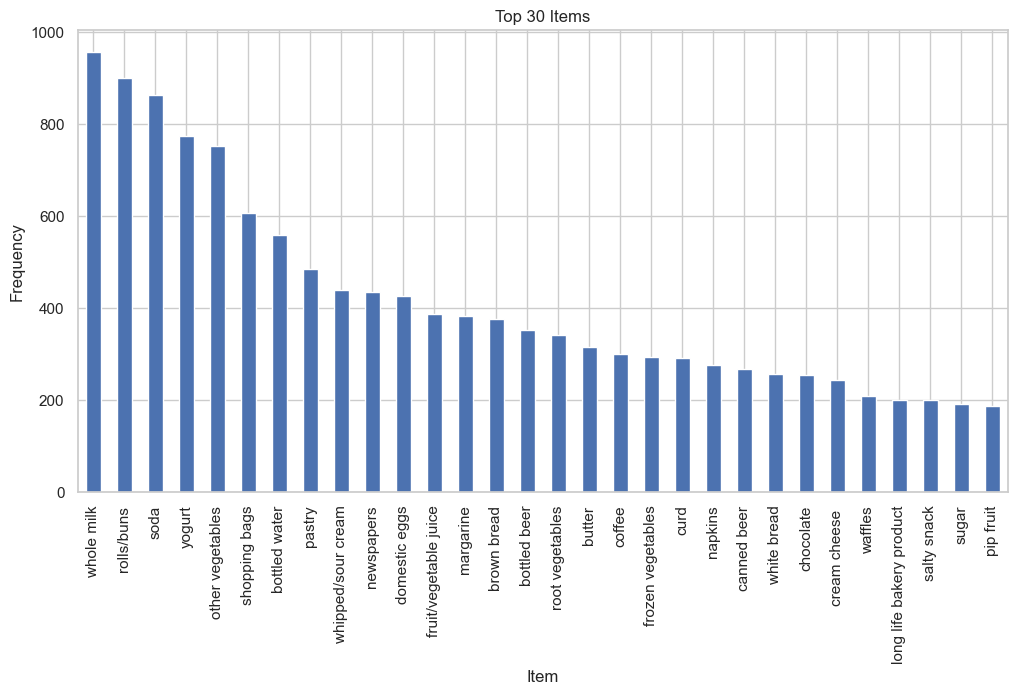

In [84]:
# Top items
plt.figure(figsize=(12, 6))
top_items = data['itemDescription'].value_counts().head(30)
top_items.plot(kind='bar')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 30 Items')
plt.show()

The "Top 30 Items" graph provides insights into the most frequently purchased items by customers. Notably, whole milk emerges as the most popular item, demonstrating the highest frequency of purchases. Other commonly bought items include buns, soda, and more.

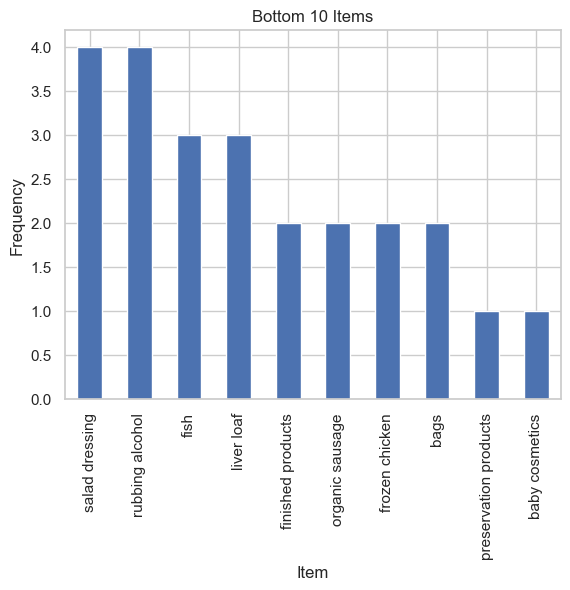

In [85]:
# Least items
least_items = data['itemDescription'].value_counts().tail(10)
least_items.plot(kind='bar')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Bottom 10 Items')
plt.show()


The "Bottom 10 Items" graph illustrates items with relatively low purchase frequencies, indicating that these products are rarely bought by customers. Analyzing these less popular items can be valuable for inventory management, as it helps businesses identify underperforming products. 

In [89]:
# Member_number analysis
member_transaction_counts = data['Member_number'].value_counts()
print ("Member Transaction Counts:")
print(member_transaction_counts.head(10))  # Top 10 members with the most transactions

Member Transaction Counts:
3308    19
3737    19
3180    19
2051    18
1410    18
4137    17
1998    16
1870    16
4272    16
3915    16
Name: Member_number, dtype: int64


The list shows how many transactions each member has made. This information provides insights into the shopping behavior of individual members, highlighting those who make more frequent purchases. Businesses can use such data to tailor promotions, loyalty programs, or personalized marketing strategies to retain and engage customers who contribute significantly to transaction volumes.

## 2. Data Preparation for Association Rules

In [87]:
# Transforming the original dataset to a format suitable for association rule mining
# Convert the 'Date' column to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Group the data by 'Member_number' and 'Date' and aggregate the items as a list
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

# Rename columns for clarity
transactions.columns = ['Member_number', 'Date', 'Items']

# Display 
transactions.head()


,Member_number,Date,Items
0,1000,2014-06-24,"[pastry, salty snack]"
1,1000,2015-03-15,"[semi-finished bread, yogurt]"
2,1000,2015-11-25,[hygiene articles]
3,1001,2014-02-07,"[whole milk, rolls/buns]"
4,1001,2014-12-12,[soda]


In [88]:
# drop the Member_number and Date column
transactions = transactions.drop(columns=['Member_number','Date'])

In [93]:
# Display 
transactions.head()


,Items
0,"[pastry, salty snack]"
1,"[semi-finished bread, yogurt]"
2,[hygiene articles]
3,"[whole milk, rolls/buns]"
4,[soda]


In [13]:
transactions.shape

(12758, 1)

In [14]:
# Convert the 'Items' column to a list of lists
data = transactions["Items"].tolist()

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit and transform the 'Items' column
te_ary = te.fit(data).transform(data)

# Create a DataFrame with the binary matrix
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the resulting DataFrame
df_encoded


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
12754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12755,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12756,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_encoded.sum()

Instant food products     45
UHT-milk                 165
abrasive cleaner          19
artif. sweetener          21
baby cosmetics             1
                        ... 
white bread              254
white wine               103
whole milk               940
yogurt                   765
zwieback                  29
Length: 164, dtype: int64

If we divide frequecy of each items with row number, we can find Support value. 

In [16]:
# Product Frequency / Total Sales
first = pd.DataFrame(df_encoded.sum() / df_encoded.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
whole milk,0.073679
rolls/buns,0.068976
soda,0.066625
yogurt,0.059962
other vegetables,0.058708
...,...
bags,0.000157
frozen chicken,0.000157
organic sausage,0.000157
baby cosmetics,0.000078


## 3. Association rule mining

In this part, the Apriori algorithm is applied to find frequent itemsets in the dataset. The min_support parameter is set to 0.001, meaning only itemsets that appear in at least 0.1% of the transactions will be considered frequent. 


In [32]:
# Apriori Algorithm with adjusted parameters
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

# Display frequent itemsets and support
print("Frequent Itemsets:")
frequent_itemsets



Frequent Itemsets:


,support,itemsets
0,0.003527,(Instant food products)
1,0.012933,(UHT-milk)
2,0.001489,(abrasive cleaner)
3,0.001646,(artif. sweetener)
4,0.007681,(baking powder)
...,...,...
195,0.001332,"(shopping bags, yogurt)"
196,0.001646,"(soda, whipped/sour cream)"
197,0.002508,"(soda, whole milk)"
198,0.002587,"(soda, yogurt)"


The Apriori algorithm is a popular algorithm for finding frequent itemsets in transactional databases. It uses the min_support parameter to filter out itemsets with support below a certain threshold.The output DataFrame shows frequent itemsets and their support values.
Each row represents an itemset, and the support column indicates the proportion of transactions containing that itemset.
Example: The itemset (Instant food products) has a support of 0.003527, meaning it appears in approximately 0.35% of all transactions.

Next, association rules are generated from the frequent itemsets with a confidence threshold of 0.04. These rules represent relationships between items where the confidence is at least 4%. 

In [137]:
# Association Rules with adjusted confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.04)

# Sort rules by confidence in descending order
rules_sorted_by_confidence = rules.sort_values(by='confidence', ascending=False)

# Display the sorted rules
print("Association Rules Sorted by Confidence:")
rules_sorted_by_confidence


Association Rules Sorted by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(canned beer),(whole milk),0.020850,0.073679,0.001254,0.060150,0.816381,-0.000282,0.985605,-0.186798
13,(napkins),(pastry),0.021242,0.037702,0.001254,0.059041,1.565987,0.000453,1.022678,0.369269
15,(napkins),(yogurt),0.021242,0.059962,0.001176,0.055351,0.923088,-0.000098,0.995118,-0.078450
14,(napkins),(whole milk),0.021242,0.073679,0.001097,0.051661,0.701154,-0.000468,0.976782,-0.303364
7,(chocolate),(rolls/buns),0.019752,0.068976,0.001019,0.051587,0.747899,-0.000343,0.981665,-0.255881
10,(frozen vegetables),(whole milk),0.022809,0.073679,0.001176,0.051546,0.699605,-0.000505,0.976664,-0.305266
18,(white bread),(other vegetables),0.019909,0.058708,0.001019,0.051181,0.871787,-0.000150,0.992067,-0.130478
22,(white bread),(rolls/buns),0.019909,0.068976,0.001019,0.051181,0.742010,-0.000354,0.981245,-0.261859
23,(shopping bags),(soda),0.046402,0.066625,0.002351,0.050676,0.760612,-0.000740,0.983199,-0.248146
21,(shopping bags),(rolls/buns),0.046402,0.068976,0.002273,0.048986,0.710193,-0.000928,0.978980,-0.299683


The sorted association rules, based on confidence in descending order, offer insights into customer purchasing patterns. For instance, customers purchasing canned beer have a 6.02% confidence in also buying whole milk, while those buying napkins exhibit a 5.90% confidence in purchasing pastry. Next, there's a 5.54% confidence that napkin buyers will also buy yogurt. These associations, though showing some confidence, generally indicate weaker connections, as suggested by the lift values. For instance, the association between chocolate and rolls/buns, with a confidence of 5.16%, is characterized by a lift of 0.748, indicating a relatively weaker correlation. Overall, these rules provide valuable information for retailers to optimize marketing and stocking strategies.

Next, rules are filtered based on a lift threshold of 0.5. This helps identify rules where the lift (the ratio of the observed support to that expected if the two rules were independent) is at least 0.5.

In [135]:
# Association Rules with adjusted lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Sort rules by confidence in descending order
rules_sorted_by_lift = rules.sort_values(by='lift', ascending=False)


# Display the rules
print("Association Rules Sorted by Lift:")
rules_sorted_by_lift

Association Rules Sorted by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
56,(pastry),(napkins),0.037702,0.021242,0.001254,0.033264,1.565987,0.000453,1.012436,0.375585
57,(napkins),(pastry),0.021242,0.037702,0.001254,0.059041,1.565987,0.000453,1.022678,0.369269
70,(newspapers),(whipped/sour cream),0.033469,0.034175,0.001176,0.035129,1.027920,0.000032,1.000989,0.028103
71,(whipped/sour cream),(newspapers),0.034175,0.033469,0.001176,0.034404,1.027920,0.000032,1.000968,0.028123
6,(pastry),(bottled water),0.037702,0.042875,0.001568,0.041580,0.969796,-0.000049,0.998649,-0.031351
...,...,...,...,...,...,...,...,...,...,...
96,(whole milk),(rolls/buns),0.073679,0.068976,0.002587,0.035106,0.508963,-0.002496,0.964898,-0.510169
17,(brown bread),(whole milk),0.029315,0.073679,0.001097,0.037433,0.508056,-0.001063,0.962344,-0.499382
16,(whole milk),(brown bread),0.073679,0.029315,0.001097,0.014894,0.508056,-0.001063,0.985361,-0.511076
49,(whole milk),(fruit/vegetable juice),0.073679,0.029707,0.001097,0.014894,0.501353,-0.001091,0.984963,-0.517773


Lift measures the ratio of the observed support to the expected support under independence, providing insights into the strength and nature of associations between items. For example, the rule "pastry" -> "napkins" indicates a strong positive correlation, as does the reverse rule "napkins" -> "pastry." However, many rules have lifts less than 1, suggesting weaker-than-expected associations. 

To enhanced item placement, focus on rules with confidence > 5% and lift > 0.6, emphasizing significant associations.

In [134]:
selected_rules = rules[(rules['confidence'] > 0.05) & (rules['lift'] > 0.6)]

selected_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(canned beer),(whole milk),0.020850,0.073679,0.001254,0.060150,0.816381,-0.000282,0.985605,-0.186798
26,(chocolate),(rolls/buns),0.019752,0.068976,0.001019,0.051587,0.747899,-0.000343,0.981665,-0.255881
42,(frozen vegetables),(whole milk),0.022809,0.073679,0.001176,0.051546,0.699605,-0.000505,0.976664,-0.305266
57,(napkins),(pastry),0.021242,0.037702,0.001254,0.059041,1.565987,0.000453,1.022678,0.369269
59,(napkins),(whole milk),0.021242,0.073679,0.001097,0.051661,0.701154,-0.000468,0.976782,-0.303364
60,(napkins),(yogurt),0.021242,0.059962,0.001176,0.055351,0.923088,-0.000098,0.995118,-0.078450
78,(white bread),(other vegetables),0.019909,0.058708,0.001019,0.051181,0.871787,-0.000150,0.992067,-0.130478
94,(white bread),(rolls/buns),0.019909,0.068976,0.001019,0.051181,0.742010,-0.000354,0.981245,-0.261859
99,(shopping bags),(soda),0.046402,0.066625,0.002351,0.050676,0.760612,-0.000740,0.983199,-0.248146
